In [163]:
import json
import pandas as pd
from pandas import DataFrame
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import scale
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, log_loss
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

In [164]:
mylist = []
for line in open('194_jan_18.json'):
    mylist.append(json.loads(line.rstrip()))

df = DataFrame.from_records(mylist)
df =  df.fillna(0)

df_sorted = df.sort_values('id')
data_cst_jan = df_sorted

data_cst_jan = data_cst_jan.groupby(data_cst_jan['id'], axis=0).sum()
data_cst_jan['u15m']= data_cst_jan['u14m'].median()
data_cst_jan['month'] = '1'
data_cst_jan = data_cst_jan.reset_index()
# print(data_cst.head())
# print(data_cst.info())

In [165]:
mylist = []
for line in open('194_feb_18.json'):
    mylist.append(json.loads(line.rstrip()))

df = DataFrame.from_records(mylist)
df =  df.fillna(0)

df_sorted = df.sort_values('id')
data_cst_feb = df_sorted

data_cst_feb = data_cst_feb.groupby(data_cst_feb['id'], axis=0).sum()
# data_cst['u15m']= data_cst['u14m'].median()
data_cst_feb['month'] = '2'
data_cst_feb = data_cst_feb.reset_index()
# print(data_cst.head())
# print(data_cst.info())

In [166]:
mylist = []
for line in open('194_mar_18.json'):
    mylist.append(json.loads(line.rstrip()))

df = DataFrame.from_records(mylist)
df =  df.fillna(0)

df_sorted = df.sort_values('id')
data_cst_mar = df_sorted

data_cst_mar = data_cst_mar.groupby(data_cst_mar['id'], axis=0).sum()
# data_cst['u15m']= data_cst['u14m'].median()
data_cst_mar['month'] = '3'
data_cst_mar = data_cst_mar.reset_index()
# print(data_cst.head())
# print(data_cst.info())

In [167]:
mylist = []
for line in open('194_apr_18.json'):
    mylist.append(json.loads(line.rstrip()))

df = DataFrame.from_records(mylist)
df =  df.fillna(0)

df_sorted = df.sort_values('id')
data_cst_apr = df_sorted

data_cst_apr = data_cst_apr.groupby(data_cst_apr['id'], axis=0).sum()
# data_cst['u15m']= data_cst['u14m'].median()
data_cst_apr['month'] = '4'
data_cst_apr = data_cst_apr.reset_index()
# print(data_cst.head())
# print(data_cst.info())

In [168]:
mylist = []
for line in open('194_may_18.json'):
    mylist.append(json.loads(line.rstrip()))

df = DataFrame.from_records(mylist)
df =  df.fillna(0)

df_sorted = df.sort_values('id')
data_cst_may = df_sorted

data_cst_may = data_cst_may.groupby(data_cst_may['id'], axis=0).sum()
# data_cst['u15m']= data_cst['u14m'].median()
data_cst_may['month'] = '5'
data_cst_may = data_cst_may.reset_index()
# print(data_cst.head())
# print(data_cst.info())

In [169]:
dframes =[data_cst_jan, data_cst_feb, data_cst_mar, data_cst_apr, data_cst_may]
dframes = pd.concat(dframes)
dframes = dframes.set_index(['month','id'])
# print(dframes.head())
# print(dframes.tail())

                c0k    c0m  c10k  c10m  c11k  c11m  c12m  c13k  c13m  c14k  \
month id                                                                     
1     379195    5.0    5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      385033  608.0  608.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      395259  615.0  615.0   8.0   2.0   9.0   2.0   2.0  18.0   0.0   0.0   
      401135  850.0  850.0   0.0   0.0   1.0   0.0   0.0   2.0   0.0   0.0   
      401237    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

              ...    u4m   u5k  u5m  u6k  u6m  u7m  u8k  u8m  u9m   uobs  
month id      ...                                                         
1     379195  ...    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   69.0  
      385033  ...    5.0  35.0  4.0  5.0  2.0  0.0  4.0  0.0  0.0  769.0  
      395259  ...    7.0   4.0  2.0  7.0  1.0  1.0  2.0  2.0  1.0  295.0  
      401135  ...    5.0   5.0  2.0  5.0  1.0  0.0  2.0  0.0  0.0  648.0  
   

In [170]:
def get_total_counts(item):
    count0_5m = (item['c1m'] + item['c2m'] + item['c3m'] + item['c4m'] + item['c5m'] +
                 item['u1m'] + item['u2m'] + item['u3m'] + item['u4m'] + item['u5m'])

    count6_10m = (item['c6m'] + item['c7m'] + item['c8m'] + item['c9m'] + item['c10m'] +
                  item['u6m'] + item['u7m'] + item['u8m'] + item['u9m'] +  item['u10m'])

    count11_15m = (item['c11m'] + item['c12m'] + item['c13m'] + item['c14m'] + item['c15m'] +
                   item['u11m'] + item['u12m'] + item['u13m'] + item['u14m'] + item['u15m'])

    count16_upm = item['c16m+'] + item['u16m+']
    return count0_5m, count6_10m, count11_15m, count16_upm

In [171]:
dframes['count_total_observations'] = dframes['obs']
(dframes['count0_5M'],
dframes['count6_10M'],
dframes['count11_15M'],
dframes['count16_upM']) = get_total_counts(dframes)

# print(dframes.head())
# print(dframes.tail())

In [172]:
def compute_weighted_values(item):

    item['obs'] = item['obs'].astype(int)
    item['count0_5M'] = item['count0_5M'].astype(int)
    item['count6_10M'] = item['count6_10M'].astype(int)
    item['count11_15M'] = item['count11_15M'].astype(int)
    item['count16_upM'] = item['count16_upM'].astype(int)

    i = item['count0_5M'] + item['count6_10M'] + item['count11_15M'] + item['count16_upM']
    weighted_i = (item['count0_5M'] + (item['count6_10M'] * 4) + (item['count11_15M'] * 7) + (item['count16_upM']*10))

    weighted_obs = (item['obs'] - i + weighted_i)
    weighted_i_rate= round(weighted_i.astype(float) / weighted_obs.astype(float) * 100.0, 2)
    return i, weighted_i, weighted_obs, weighted_i_rate

In [173]:
(dframes['i'],
dframes['weighted_i'],
dframes['weighted_obs'],
dframes['weighted_i_rate']) = compute_weighted_values(dframes)

# print(dframes.head())
# print(dframes.tail())

In [174]:
SCALE_MIN = 350
SCALE_MAX = 850

scale_range = SCALE_MAX - SCALE_MIN
dframes['score'] = round((100 - dframes['weighted_i_rate']) * scale_range / 100.0 + SCALE_MIN, 2)

dframes = dframes.reset_index()
dframes = dframes.fillna(0)
# print(dframes.info())
# print(dframes.head())

# dframes['id'] = dframes['id'].astype(str)

score_sorted = dframes.sort_values('month')

In [175]:
dframes['driver'] = pd.Series(range(1,(len(dframes['id']) + 1)))


df_raw_values = dframes[['month', 'driver', 'c0m', 'c1m', 'c2m', 'c3m', 'c4m', 'c5m', 'c6m', 'c7m', 'c8m', 'c9m', 'c10m', 'c11m', 'c12m', 'c13m', 'c14m', 'c15m', 'c16m+', 
                         'u0m', 'u1m', 'u2m', 'u3m', 'u4m', 'u5m', 'u6m', 'u7m', 'u8m', 'u9m', 'u10m', 'u11m', 'u12m', 'u13m', 'u14m', 'u15m', 'u16m+', 'score']]

# print(df_raw_values.head())
# print(df_raw_values.tail())




  month  driver    c0m   c1m   c2m   c3m   c4m  c5m  c6m  c7m   ...    u8m  \
0     1       1    5.0   1.0   0.0   1.0   0.0  0.0  0.0  0.0   ...    0.0   
1     1       2  608.0   2.0   2.0   0.0   3.0  0.0  0.0  0.0   ...    0.0   
2     1       3  615.0  49.0  96.0  20.0  10.0  3.0  8.0  9.0   ...    2.0   
3     1       4  850.0  93.0  42.0  19.0   2.0  0.0  0.0  1.0   ...    0.0   
4     1       5    0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   ...    0.0   

   u9m  u10m  u11m  u12m  u13m  u14m  u15m  u16m+   score  
0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  830.25  
1  0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0  808.45  
2  1.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  691.70  
3  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  776.90  
4  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  850.00  

[5 rows x 37 columns]
     month  driver   c0m  c1m  c2m  c3m  c4m  c5m  c6m  c7m   ...    u8m  u9m  \
1177     5    1178   8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...  

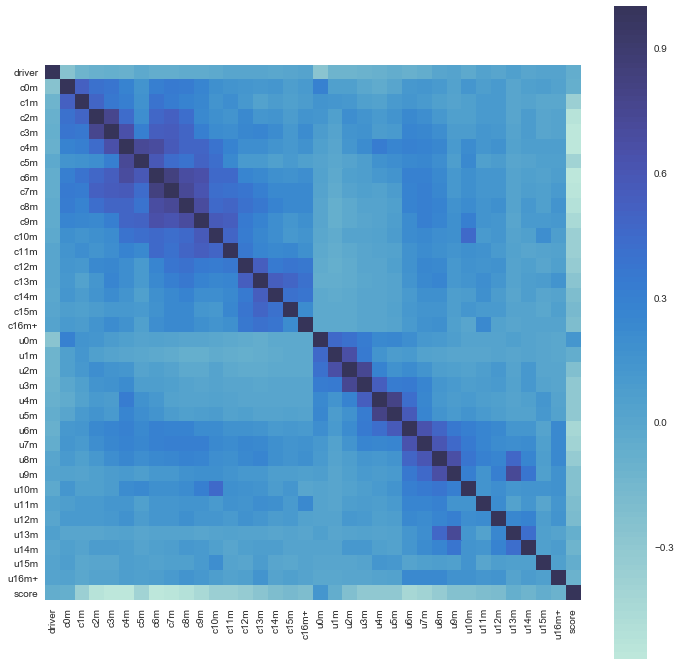

In [176]:
cm = df_raw_values.corr()
plt.figure(figsize = (12,12))
sns.heatmap(cm, square=True, center=1.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

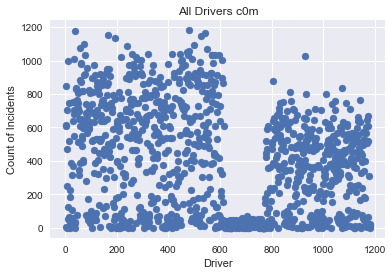

In [177]:
plt.scatter(df_raw_values['driver'], df_raw_values['c0m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('All Drivers c0m')
plt.show()

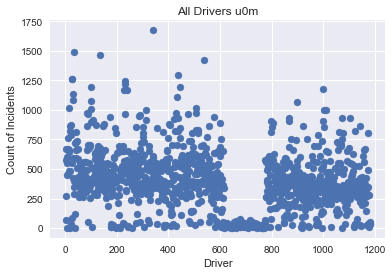

In [178]:
plt.scatter(df_raw_values['driver'], df_raw_values['u0m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('All Drivers u0m')
plt.show()

In [179]:
#drop drivers who have very few data points, drops from 1182 to 805 drivers
df_raw_values_trim = df_raw_values.drop(df_raw_values[df_raw_values.c0m < 75].index)
print(df_raw_values_trim.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 1 to 1176
Data columns (total 37 columns):
month     805 non-null object
driver    805 non-null int64
c0m       805 non-null float64
c1m       805 non-null float64
c2m       805 non-null float64
c3m       805 non-null float64
c4m       805 non-null float64
c5m       805 non-null float64
c6m       805 non-null float64
c7m       805 non-null float64
c8m       805 non-null float64
c9m       805 non-null float64
c10m      805 non-null float64
c11m      805 non-null float64
c12m      805 non-null float64
c13m      805 non-null float64
c14m      805 non-null float64
c15m      805 non-null float64
c16m+     805 non-null float64
u0m       805 non-null float64
u1m       805 non-null float64
u2m       805 non-null float64
u3m       805 non-null float64
u4m       805 non-null float64
u5m       805 non-null float64
u6m       805 non-null float64
u7m       805 non-null float64
u8m       805 non-null float64
u9m       805 non-null float6

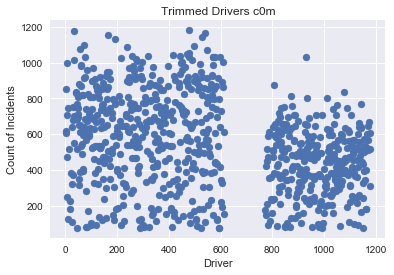

In [180]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c0m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c0m')
plt.show()

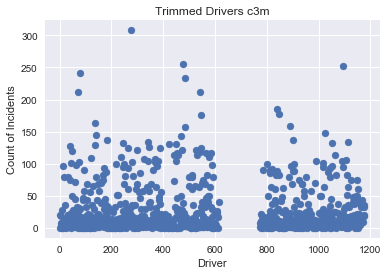

In [181]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c3m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c3m')
plt.show()

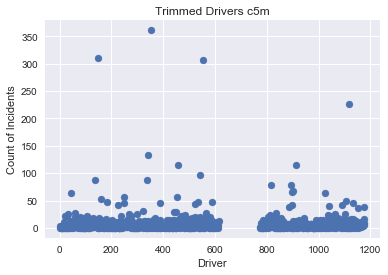

In [182]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c5m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c5m')

plt.show()

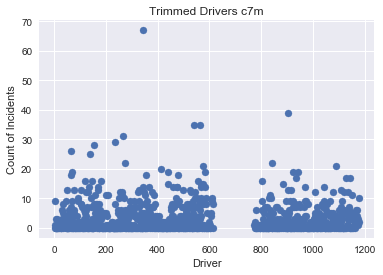

In [183]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c7m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c7m')

plt.show()

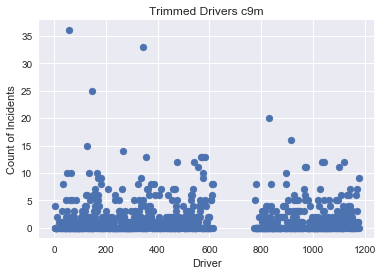

In [184]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c9m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c9m')

plt.show()

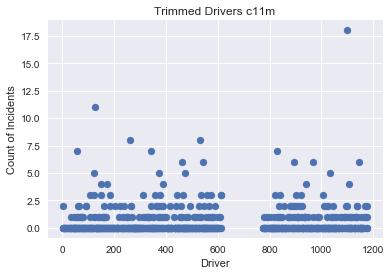

In [185]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c11m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c11m')

plt.show()

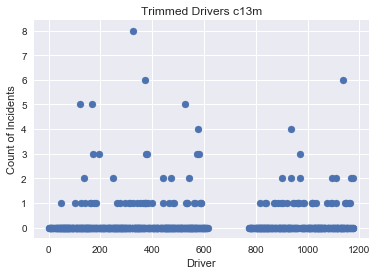

In [186]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c13m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c13m')

plt.show()

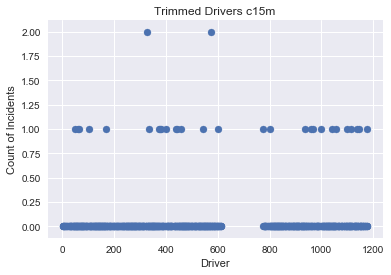

In [187]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c15m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c15m')

plt.show()

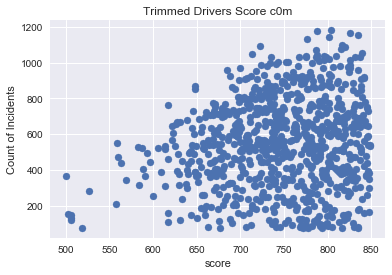

In [188]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c0m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c0m')

plt.show()

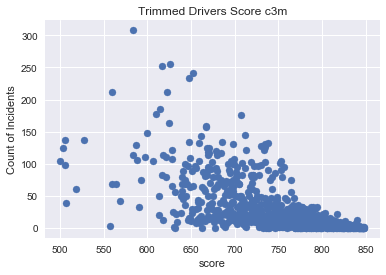

In [189]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c3m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c3m')

plt.show()

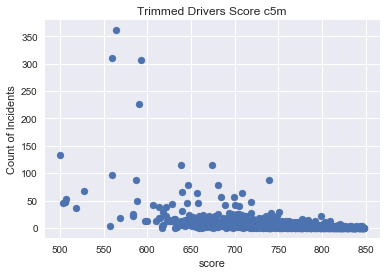

In [190]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c5m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c5m')

plt.show()

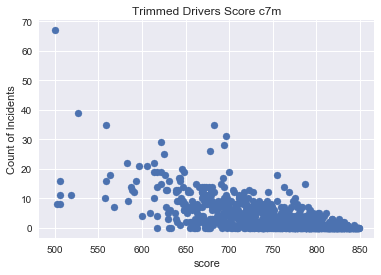

In [191]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c7m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c7m')

plt.show()

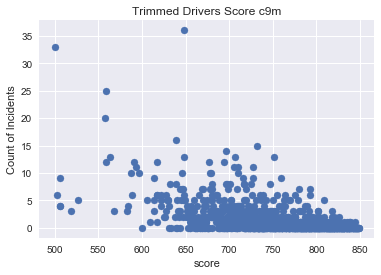

In [192]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c9m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c9m')
plt.show()

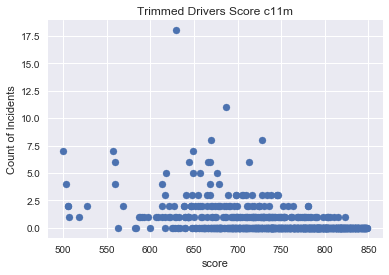

In [193]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c11m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c11m')

plt.show()

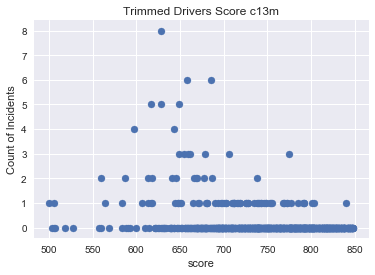

In [194]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c13m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c13m')

plt.show()

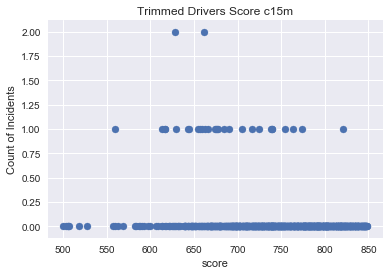

In [195]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c15m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c15m')

plt.show()

In [198]:
X = df_raw_values_trim.drop(['score', 'month', 'driver'], axis=1).values
y = df_raw_values_trim['score'].values
print(X.shape, y.shape)

(805, 34) (805,)


In [ ]:
test_X = test_houses_both.values
print(test_X.shape)

# Ridge regression alpha 0.1

In [224]:
pl= Pipeline([('clf', Ridge(alpha=0.1, normalize=True))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)

y_pred= pl.predict(X_test)
cv_results= cross_val_score(pl, X_test, y_test, cv=5)

print('Score of logreg {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of logreg, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))


Score of logreg 0.9280404605030987
Cross_Val Score of logreg, [0.94614374 0.92514455 0.90991272 0.85522482 0.82888212]
Mean of Cross_val score: 0.89306158916614


# Ridge regression alpha 0.2

In [201]:
pl= Pipeline([('clf', Ridge(alpha=0.2, normalize=True))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)

y_pred= pl.predict(X_test)
cv_results= cross_val_score(pl, X_test, y_test, cv=5)

print('Score of logreg {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of logreg, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))

Score of logreg 0.9235528585861855
Cross_Val Score of logreg, [0.95142148 0.92535379 0.91399266 0.84162452 0.84460588]
Mean of Cross_val score: 0.8953996662051461
